In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.make_blobs(n_samples=150,
                           n_features=2,
                           centers=2,
                           cluster_std=1.05,
                           random_state=2)

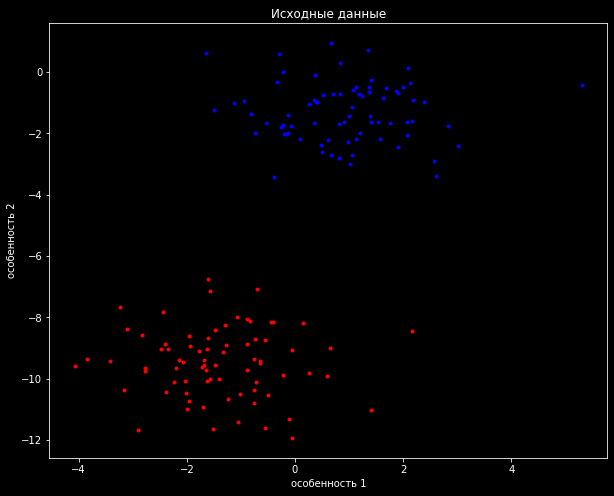

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r.')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'b.')
plt.xlabel("особенность 1")
plt.ylabel("особенность 2")
plt.title('Исходные данные')
plt.show()

In [ ]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [ ]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n+1, 1))    
    n_miss_list = []
    
    for epoch in range(epochs):
        n_miss = 0
        
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, w))     
            
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)
                n_miss += 1
      
        n_miss_list.append(n_miss)
        
    return w, n_miss_list

In [ ]:
def plot_decision_boundary(X, y, w):

    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
    plt.xlabel("особенность 1")
    plt.ylabel("особенность 2")
    plt.title('Перцептрон')
    plt.plot(x1, x2, 'g-')
    plt.show()

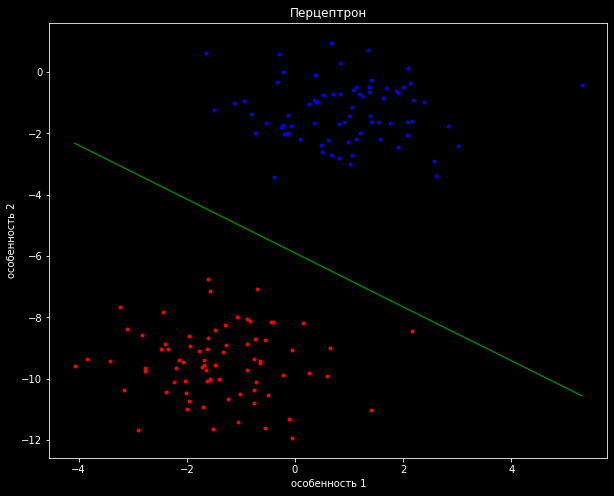

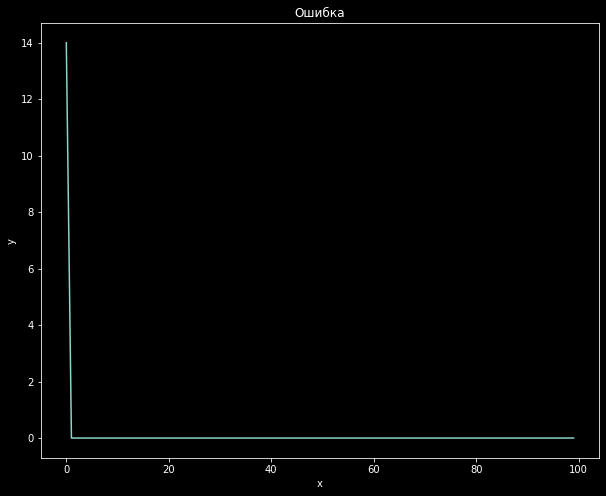

In [ ]:
w, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, y, w)  

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)

plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()

In [ ]:
X1, y1 = datasets.make_blobs(n_samples=150,
                             n_features=2,
                             centers=2,
                             cluster_std=0.8,
                             random_state=4)

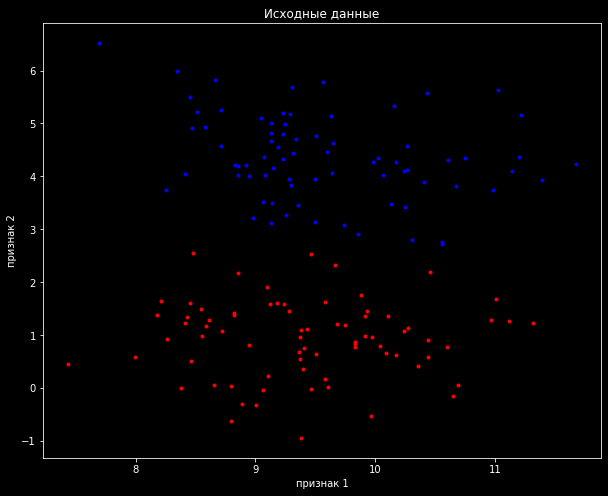

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'r.')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'b.')
plt.xlabel("признак 1")
plt.ylabel("признак 2")
plt.title('Исходные данные')
plt.show()

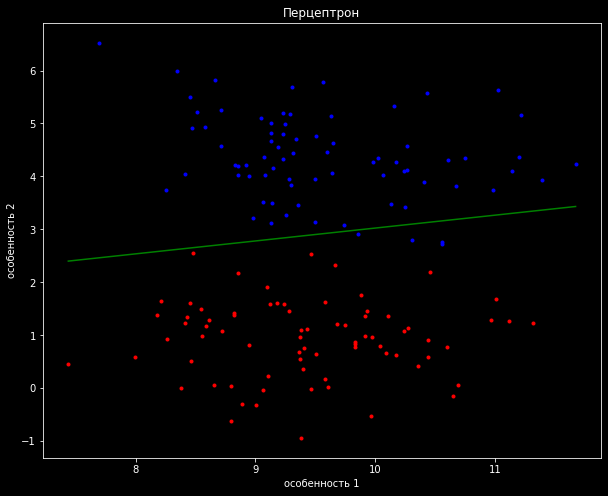

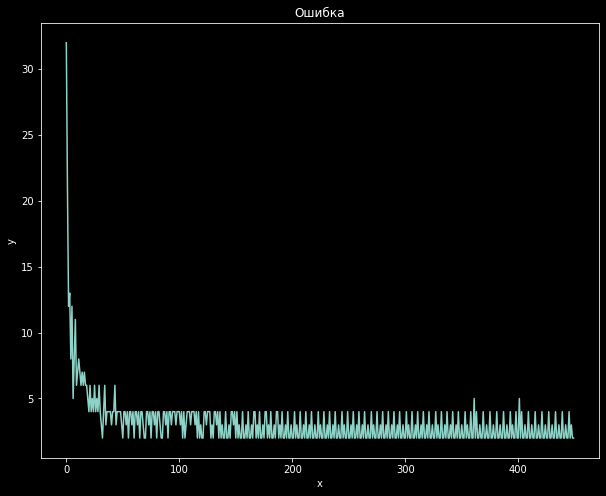

In [ ]:
w, miss_l = perceptron(X1, y1, 0.5, 450)
plot_decision_boundary(X1, y1, w)

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()

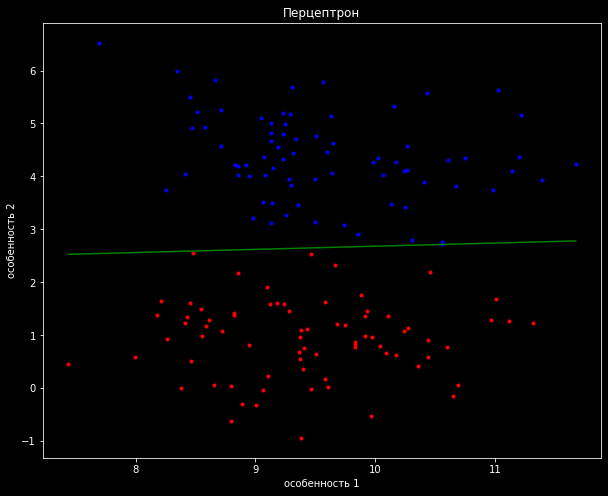

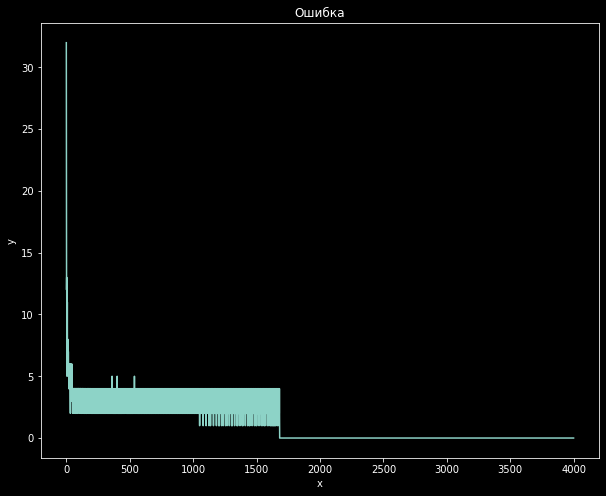

In [ ]:
w, miss_l = perceptron(X1, y1, 0.5, 4000)
plot_decision_boundary(X1, y1, w)

fig = plt.figure(figsize=(10,8))
plt.plot(miss_l)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Ошибка')
plt.show()
# ошибка исчезает после ~1 650 итераций